# Library Import

Mengimport semua library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from google.colab import files

# Dataset

Dataset yang digunakan diambil dari dataset Kaggle yang dapat diunduh dari link di bawah ini

https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification

Kemudian upload dataset tersebut

In [ ]:
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
df = pd.read_csv('diabetes_data.csv', sep=';')
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Data Preprocessing

Meliat summary dataset menggunakan .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

Mengubah data kategorikal pada kolom gender menjadi numerik. Male menjadi 0 dan Female menjadi 1

In [ ]:
df.gender[df.gender == 'Male'] = 0
df.gender[df.gender == 'Female'] = 1

<ipython-input-5-7a9cec265351>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'Male'] = 0
<ipython-input-5-7a9cec265351>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == 'Female'] = 1


Mengecek apakah terdapat data yang *null* atau data kosong

In [ ]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

Membagi dataset menjadi data X sebagai variabel independen dan data y atau label sebagai variabel dependen 

In [ ]:
X = df.iloc[:, 0:16].values
y = df.iloc[:, 16].values

Melakukan train test split data dengan proporsi test size sebesar 0.3 atau 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3
)

Mengubah data X dan y pada masing-masing training data dan test data menjadi float

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Model Development

Membuat model machine learning dengan arsitektur 1 input layer, 3 Dense layer, 2 Dropout layer, dan 1 output layer

In [ ]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(16,)),
  Dense(64, activation='relu'),
  Dropout(0.25),
  Dense(32, activation='relu'),
  Dropout(0.25),
  Dense(1, activation='sigmoid')
])

Mengcompile model dengan adam optimizer, loss function binary crossentropy, dan metrics accuracy

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

Memasukkan atau melatih model dengan data training dan juga data testing pada validation data.

In [ ]:
h = model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 36ms/step - loss: 0.9349 - accuracy: 0.5385 - val_loss: 0.6340 - val_accuracy: 0.6410
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7765 - accuracy: 0.5357 - val_loss: 0.6481 - val_accuracy: 0.7949
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5604 - val_loss: 0.6041 - val_accuracy: 0.6410
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6857 - accuracy: 0.5687 - val_loss: 0.6258 - val_accuracy: 0.6410
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6726 - accuracy: 0.5852 - val_loss: 0.5797 - val_accuracy: 0.6410
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6016 - accuracy: 0.6538 - val_loss: 0.5352 - val_accuracy: 0.8654
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.6676 - val_loss: 0.5098 - val_accuracy: 0.6410
Epoch 8/100


# Model Evaluation

Evaluasi model machine learning dengan data testing.

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 0.9231


[0.20614337921142578, 0.9230769276618958]

Membuat grafik atau plot dari akurasi dan loss hasil training model di atas 

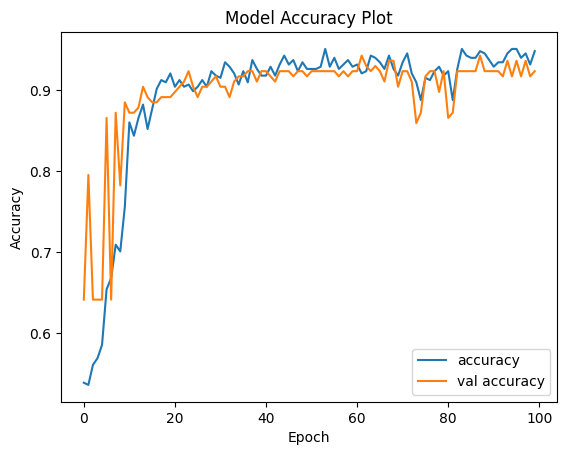

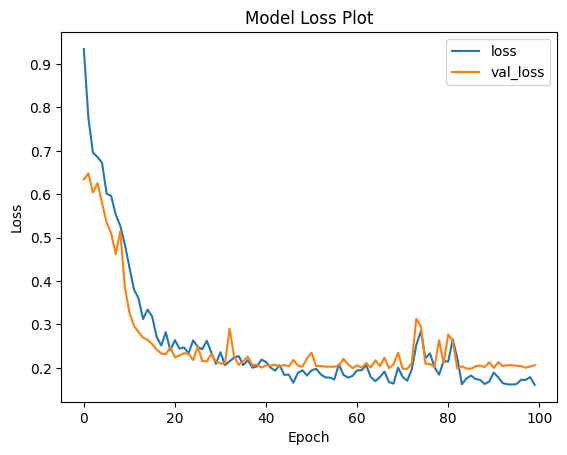

In [ ]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.title('Model Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Berdasarkan grafik di atas dapat dilihat bahwa akurasi model meningkat seiring bertambahnya epoch, dan loss menurun dengan seiring bertambahnya epoch.

# Model Testing

Menguji model dengan data yang baru dengan membuat list data yang baru

In [ ]:
test_data = [[35,'Female',0,1,1,1,1,0,0,1,0,0,1,0,0,0],  # label 1
             [70,'Male',1,0,1,1,1,1,0,0,1,1,1,1,1,0],    # label 1
             [51,'Female',0,0,0,0,0,1,0,1,0,1,0,0,1,0],  # label 0
             [55,'Male',0,0,0,1,1,0,1,1,0,1,0,1,0,1]]    # label 0

Mengubah data Female dan Male menjadi numerik

In [ ]:
for i in range(len(test_data)):
  if (test_data[i][1] == 'Male'):
    test_data[i][1] = 0
  else:
    test_data[i][1] = 1

Memprediksi model dengan data yang baru

In [ ]:
prediction = model.predict([test_data[0]])
prediction

1/1 [==============================] - 0s 120ms/step


array([[0.99958146]], dtype=float32)

In [ ]:
if (prediction < 0.5):
  print('Tidak Diabtes')
else:
  print('Diabetes')

Diabetes


# Kesimpulan

Berdasarkan analisis terhadap hasil akurasi dan tingkat loss model machine learning tersebut dapat disimpulkan bahwa model berhasil mengklasifikasikan data orang yang terkena diabetes dan orang yang tidak terkena diabetes menggunakan metode Deep Learning. Model tersebut menunjukkan tingkat akurasi sebesar 94.78% dalam evaluasi model, yang menunjukkan kemampuan yang baik dalam mengklasifikasikan penyakit diabetes. Selain itu, hasil dari loss function pada model tersebut juga cukup rendah 0.1608, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam mengurangi kesalahan prediksi.

In [ ]:
model.save('saved_model')
model.save('saved_model.h5')

In [ ]:
!zip -r saved_model.zip saved_model/

  adding: saved_model/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 42%)
  adding: saved_model/variables/variables.index (deflated 62%)
  adding: saved_model/saved_model.pb (deflated 88%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/keras_metadata.pb (deflated 89%)
  adding: saved_model/fingerprint.pb (stored 0%)


In [ ]:
files.download('saved_model.zip')
files.download('saved_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>